# 🐾 Análisis de Datos del Refugio de Animales de Austin

Este notebook tiene como objetivo explorar y analizar un conjunto de datos reales del **Austin Animal Center**, el refugio de animales más grande de los Estados Unidos con política *no-kill*. Este centro recibe más de 18.000 animales por año y participa en iniciativas para la protección y el cuidado de animales abandonados, en riesgo o entregados.

Los datos proporcionados por la **Iniciativa de Datos Abiertos de la Ciudad de Austin** incluyen información sobre los resultados (adopciones, traslados, liberaciones, pérdidas, etc.) de animales desde octubre de 2013 hasta la actualidad.

En este análisis trabajaremos con la biblioteca **pandas** para limpiar, transformar y visualizar la información con fines exploratorios.

📁 Dataset: `aac_shelter_cat_outcome_eng.csv`


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("aac_shelter_cat_outcome_eng.csv")
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 🔍 Exploración inicial del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_upon_outcome      29421 non-null  object 
 1   animal_id             29421 non-null  object 
 2   animal_type           29421 non-null  object 
 3   breed                 29421 non-null  object 
 4   color                 25795 non-null  object 
 5   date_of_birth         29421 non-null  object 
 6   datetime              29421 non-null  object 
 7   monthyear             29421 non-null  object 
 8   name                  16647 non-null  object 
 9   outcome_subtype       18641 non-null  object 
 10  outcome_type          29418 non-null  object 
 11  sex_upon_outcome      29421 non-null  object 
 12  count                 29421 non-null  int64  
 13  sex                   29421 non-null  object 
 14  Spay/Neuter           29421 non-null  object 
 15  Periods            

In [4]:
df.describe(include='all')

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
count,29421,29421,29421,29421,25795,29421,29421,29421,16647,18641,...,29421,29421.000000,29421,52,29421,29421,19155,29421,10354,29421
unique,45,28209,1,65,154,4080,21927,21927,7409,17,...,7,NaN,41,14,2,2,9,40,19,44
top,2 months,A697910,Cat,domestic shorthair,brown,2015-04-28 00:00:00,2015-08-11 00:00:00,2015-08-11T00:00:00,Bella,Partner,...,Saturday,NaN,domestic shorthair,domestic shorthair,False,True,tabby,black,white,black
freq,5935,5,29421,23720,4462,68,25,25,56,9486,...,5151,NaN,23728,21,27678,27720,13613,7020,8617,7020
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.005778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.863269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ❓ Revisión de valores faltantes

In [5]:
df.isna().sum().sort_values(ascending=False)

breed2                  29369
color2                  19067
name                    12774
outcome_subtype         10780
coat_pattern            10266
color                    3626
outcome_type                3
animal_id                   0
age_upon_outcome            0
breed                       0
animal_type                 0
monthyear                   0
date_of_birth               0
sex                         0
Spay/Neuter                 0
Periods                     0
Period Range                0
outcome_age_(days)          0
datetime                    0
sex_upon_outcome            0
count                       0
sex_age_outcome             0
Cat/Kitten (outcome)        0
outcome_age_(years)         0
age_group                   0
outcome_month               0
dob_year                    0
dob_month                   0
dob_monthyear               0
outcome_hour                0
outcome_weekday             0
outcome_year                0
breed1                      0
domestic_b

## 🧼 Limpieza básica de datos

In [6]:
# Eliminar columnas poco informativas si las hubiera
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    "animal_id": "ID",
    "name": "Nombre",
    "date_of_birth": "FechaNacimiento",
    "outcome_type": "TipoResultado",
    "outcome_subtype": "SubtipoResultado",
    "animal_type": "TipoAnimal",
    "sex_upon_outcome": "Sexo",
    "age_upon_outcome": "Edad",
    "breed": "Raza",
    "color": "Color"
})

df.head()

,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 📊 Distribución de resultados de los animales

C:\Users\ezeni\AppData\Local\Temp\ipykernel_6580\3628745631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')


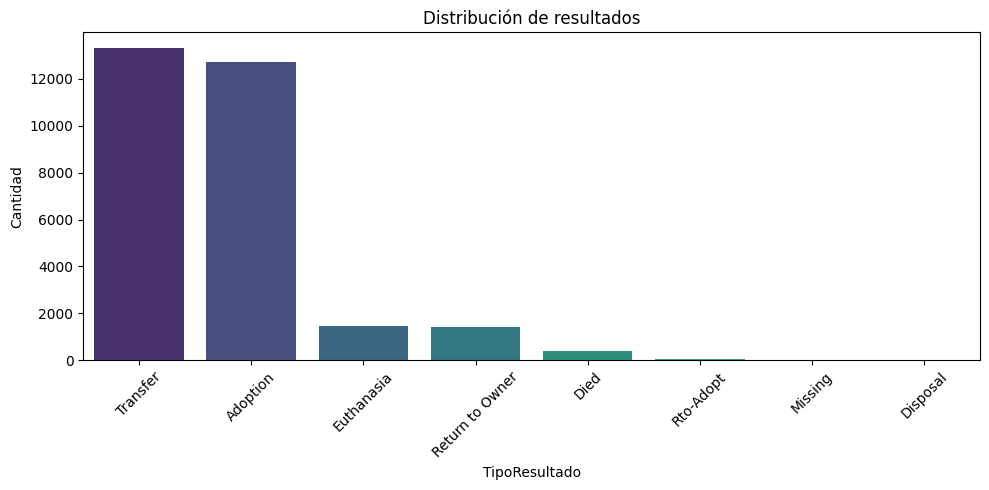

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')
plt.title("Distribución de resultados")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🐱🐶 ¿Qué tipo de animales se registran con más frecuencia?

C:\Users\ezeni\AppData\Local\Temp\ipykernel_6580\786027994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoAnimal', palette='Set2')


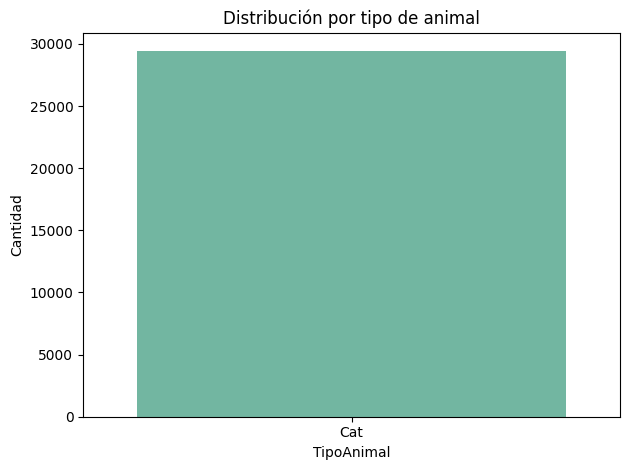

In [8]:
sns.countplot(data=df, x='TipoAnimal', palette='Set2')
plt.title("Distribución por tipo de animal")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## ⚥ Relación entre el sexo y el resultado del animal

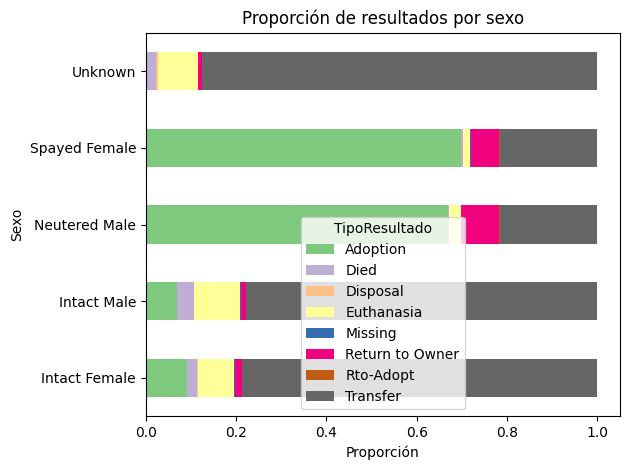

In [9]:
pd.crosstab(df['Sexo'], df['TipoResultado'], normalize='index').plot(kind='barh', stacked=True, colormap='Accent')
plt.title("Proporción de resultados por sexo")
plt.xlabel("Proporción")
plt.tight_layout()
plt.show()

## ⌛ ¿Qué edades tienen los animales al momento del resultado?

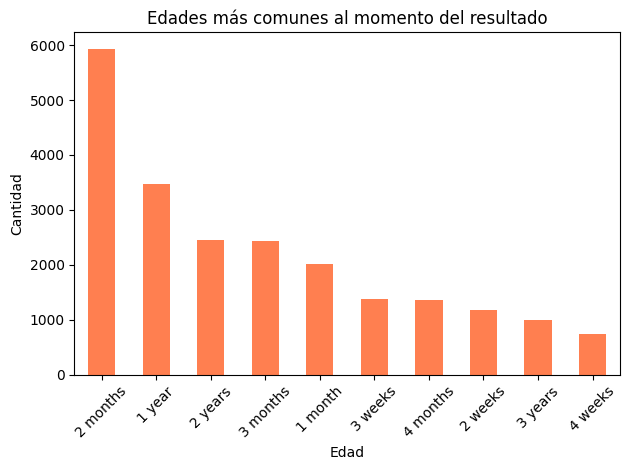

In [10]:
df['Edad'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Edades más comunes al momento del resultado")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧪 Actividades prácticas y desafíos

A continuación se presentan algunos ejercicios para que pongas en práctica lo aprendido y explores más a fondo el dataset:

1. **Filtrar por especie:** Mostrá sólo los registros correspondientes a gatos (`Cat`). ¿Cuántos hay en total?

2. **Top razas:** ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.

3. **Animales con nombre:** ¿Qué proporción de animales tiene nombre? Representalo con un gráfico de torta.

4. **Resultados por raza dominante:** Analizá si hay razas que tienen mayores tasas de adopción. Filtrá las 10 razas más frecuentes y compará los resultados.

5. **Edad más común:** ¿Cuál es la edad al momento del resultado más frecuente para los animales adoptados?

6. **Nombres más comunes:** ¿Cuáles son los 10 nombres de animales más comunes en el dataset?

7. **Cruza o no cruza:** Agregá una nueva columna que indique si el animal es de raza pura o mestizo, en base a la columna de raza (`Raza`).

8. **Tendencia de adopciones:** Convertí la columna de fecha de nacimiento a datetime y tratá de analizar si hay alguna relación entre el año de nacimiento y la probabilidad de adopción.

9. **Relación entre edad y resultado:** Explorá si existe una diferencia en el tipo de resultado según la edad del animal.

10. **Exportar datos filtrados:** Filtrá los animales que fueron adoptados y guardalos en un nuevo archivo CSV llamado `adoptados.csv`.

---

> 💡 ¡Podés utilizar todas las herramientas de pandas que practicamos: filtros, agrupaciones, gráficos, funciones lambda, creación de columnas nuevas y más!


1. **Filtrar por especie:** Mostrá sólo los registros correspondientes a gatos (`Cat`). ¿Cuántos hay en total?

In [12]:
gatos = df[df['TipoAnimal'] == 'Cat']
print(f"Cantidad total de gatos: {gatos.shape[0]}")
gatos.head()

Cantidad total de gatos: 29421


,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


2. **Top razas:** ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.


In [17]:
top_5_razas = df['Raza'].value_counts().head(5)
print(f'Top 5 razas más comunes:\n{top_5_razas}')

Top 5 razas más comunes:
Raza
domestic shorthair     23720
domestic mediumhair     2454
domestic longhair       1273
siamese                 1058
american shorthair       211
Name: count, dtype: int64


C:\Users\ezeni\AppData\Local\Temp\ipykernel_6580\51548827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_razas.values, y=top_5_razas.index, palette='pastel')


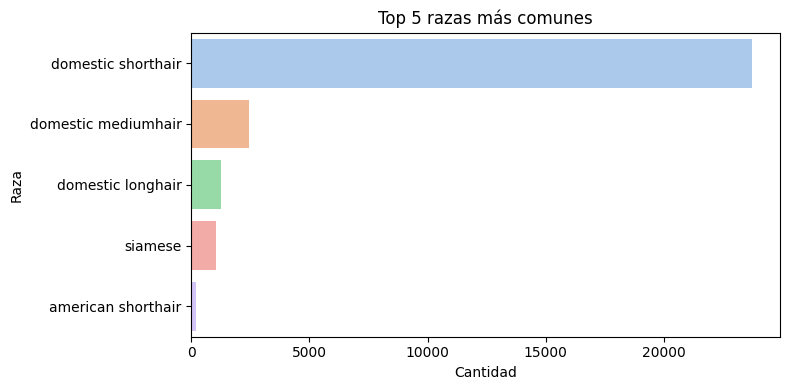

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_5_razas.values, y=top_5_razas.index, palette='pastel')
plt.title("Top 5 razas más comunes")
plt.xlabel("Cantidad")
plt.tight_layout()
plt.show()

3. **Animales con nombre:** ¿Qué proporción de animales tiene nombre? Representalo con un gráfico de torta.

In [25]:
dataNombres = df['Nombre'].notna() & (df['Nombre'].str.strip() != '')
proporciones = dataNombres.value_counts()
proporciones

Nombre
True     16647
False    12774
Name: count, dtype: int64

In [27]:
# proporciones con y sin nombre
print(f"Proporción con nombre: {proporciones[True]}")
print(f"Proporción sin nombre: {proporciones[False]}")

Proporción con nombre: 16647
Proporción sin nombre: 12774


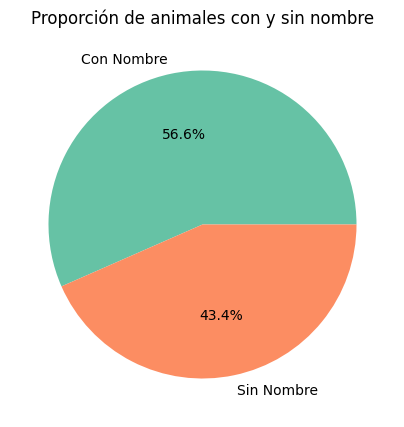

In [28]:
plt.figure(figsize=(5,5))
plt.pie(proporciones, labels=['Con Nombre', 'Sin Nombre'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title("Proporción de animales con y sin nombre")
plt.show()

4. **Resultados por raza dominante:** Analizá si hay razas que tienen mayores tasas de adopción. Filtrá las 10 razas más frecuentes y compará los resultados.

In [31]:
top_10_razas_nombres = df['Raza'].value_counts().head(10).index
top_10_razas_nombres

Index(['domestic shorthair', 'domestic mediumhair', 'domestic longhair',
       'siamese', 'american shorthair', 'snowshoe', 'maine coon', 'manx',
       'russian blue', 'himalayan'],
      dtype='object', name='Raza')

In [32]:
filtrado_de_razas = df[df['Raza'].isin(top_10_razas_nombres)]
filtrado_de_razas

,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29416,2 months,A758112,Cat,american shorthair,blue /white,2017-09-14 00:00:00,2017-12-10 17:44:00,2017-12-10T17:44:00,Allee Chat,NaN,...,Sunday,17,american shorthair,NaN,True,False,tabby,blue,white,blue
29417,1 month,A758569,Cat,domestic shorthair,brown /white,2017-08-03 00:00:00,2017-09-24 11:57:00,2017-09-24T11:57:00,Mia,NaN,...,Sunday,11,domestic shorthair,NaN,False,True,tabby,brown,white,brown
29418,1 year,A765938,Cat,domestic shorthair,brown,2017-01-30 00:00:00,2018-02-01 17:51:00,2018-02-01T17:51:00,NaN,Partner,...,Thursday,17,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
29419,6 months,A765832,Cat,domestic shorthair,NaN,2017-07-28 00:00:00,2018-02-01 16:37:00,2018-02-01T16:37:00,Luna,NaN,...,Thursday,16,domestic shorthair,NaN,False,True,tortie,Breed Specific,NaN,tortie


In [41]:
tabla_resultado = pd.crosstab(filtrado_de_razas['Raza'], filtrado_de_razas['TipoResultado'])
tabla_resultado

TipoResultado,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
Raza,,,,,,,,
american shorthair,77,4,0,7,1,14,0,108
domestic longhair,605,20,0,85,1,100,1,461
domestic mediumhair,1112,39,0,136,2,101,3,1061
domestic shorthair,10080,319,15,1141,22,1060,28,11052
himalayan,16,1,0,4,0,7,0,10
maine coon,62,0,0,4,0,19,0,31
manx,45,1,0,1,0,6,0,27
russian blue,35,0,0,1,0,15,0,18
siamese,492,14,1,58,2,73,1,417


5. **Edad más común:** ¿Cuál es la edad al momento del resultado más frecuente para los animales adoptados?

In [37]:
adoptados = df[df['TipoResultado'] == 'Adoption']
adoptados

,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,...,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,...,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,...,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29415,1 year,A765881,Cat,domestic mediumhair,brown /white,2016-07-29 00:00:00,2018-02-01 14:50:00,2018-02-01T14:50:00,Wonder Woman,NaN,...,Thursday,14,domestic mediumhair,NaN,False,True,tabby,brown,white,brown
29416,2 months,A758112,Cat,american shorthair,blue /white,2017-09-14 00:00:00,2017-12-10 17:44:00,2017-12-10T17:44:00,Allee Chat,NaN,...,Sunday,17,american shorthair,NaN,True,False,tabby,blue,white,blue
29417,1 month,A758569,Cat,domestic shorthair,brown /white,2017-08-03 00:00:00,2017-09-24 11:57:00,2017-09-24T11:57:00,Mia,NaN,...,Sunday,11,domestic shorthair,NaN,False,True,tabby,brown,white,brown
29419,6 months,A765832,Cat,domestic shorthair,NaN,2017-07-28 00:00:00,2018-02-01 16:37:00,2018-02-01T16:37:00,Luna,NaN,...,Thursday,16,domestic shorthair,NaN,False,True,tortie,Breed Specific,NaN,tortie


In [49]:
edad_mas_comun_adoptados = adoptados['Edad'].mode()[0]
cantidad = adoptados['Edad'].value_counts().iloc[0]
print(f"La edad más común de los gatos al momento de la adopción es {edad_mas_comun_adoptados} con una cantidad de {cantidad} casos.")


La edad más común de los gatos al momento de la adopción es 2 months con una cantidad de 4974 casos.


6. **Nombres más comunes:** ¿Cuáles son los 10 nombres de animales más comunes en el dataset?

In [ ]:
#filtrando nombres
nombres_validos_sinNaN = df['Nombre'].dropna()
nombres_validos = nombres_validos_sinNaN[nombres_validos_sinNaN.str.strip() != '']
nombres_validos

1                Lucy
2              *Frida
3         Stella Luna
5                Elsa
7             Chester
             ...     
29415    Wonder Woman
29416      Allee Chat
29417             Mia
29419            Luna
29420             Mac
Name: Nombre, Length: 16647, dtype: object

In [54]:
#top 10 nombres más comunes
top_10_nombres = nombres_validos.value_counts().head(10)
print(f'Top 10 nombres más comunes:\n{top_10_nombres}')

Top 10 nombres más comunes:
Nombre
Bella       56
Luna        50
Kitty       47
Charlie     44
Lucy        41
Tiger       40
Smokey      40
*Charlie    37
Oliver      36
X           34
Name: count, dtype: int64


7. **Cruza o no cruza:** Agregá una nueva columna que indique si el animal es de raza pura o mestizo, en base a la columna de raza (`Raza`).

In [55]:
df['EsMestizo'] = df['Raza'].str.contains('Mix|Domestic', case=False, na=False)
df['TipoRaza'] = df['EsMestizo'].map({True: 'Mestizo', False: 'Raza pura'})

df[['Raza', 'TipoRaza']].head(10)

,Raza,TipoRaza
0,domestic shorthair,Mestizo
1,domestic shorthair,Mestizo
2,domestic shorthair,Mestizo
3,domestic mediumhair,Mestizo
4,domestic shorthair,Mestizo
5,domestic shorthair,Mestizo
6,domestic shorthair,Mestizo
7,domestic shorthair,Mestizo
8,domestic shorthair,Mestizo
9,domestic mediumhair,Mestizo


8. **Tendencia de adopciones:** Convertí la columna de fecha de nacimiento a datetime y tratá de analizar si hay alguna relación entre el año de nacimiento y la probabilidad de adopción.

In [57]:
df['FechaNacimiento'] = pd.to_datetime(df['FechaNacimiento'], errors='coerce')
df['AnioNacimiento'] = df['FechaNacimiento'].dt.year
df['AnioNacimiento'].value_counts()

AnioNacimiento
2015    6465
2014    6010
2016    5046
2017    3843
2013    3318
2012    1257
2011     740
2010     532
2009     423
2007     338
2008     329
2006     245
2005     213
2004     188
2002     128
2001     100
2003      96
2000      59
1999      35
1998      30
1994       8
1997       7
1996       5
1995       4
1992       1
1993       1
Name: count, dtype: int64

In [60]:
adopciones_por_anio = df.groupby('AnioNacimiento')['TipoResultado'].value_counts()
#Convertir el índice jerárquico (año, tipo resultado) en columnas para facilitar la lectura
adopciones_por_anio.unstack().fillna(0)

TipoResultado,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
AnioNacimiento,,,,,,,,
1992,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1994,0.0,0.0,0.0,5.0,0.0,2.0,0.0,1.0
1995,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
1996,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1997,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
1998,9.0,0.0,0.0,8.0,0.0,8.0,0.0,5.0
1999,7.0,0.0,0.0,10.0,0.0,13.0,0.0,5.0
2000,17.0,1.0,0.0,10.0,0.0,14.0,0.0,17.0


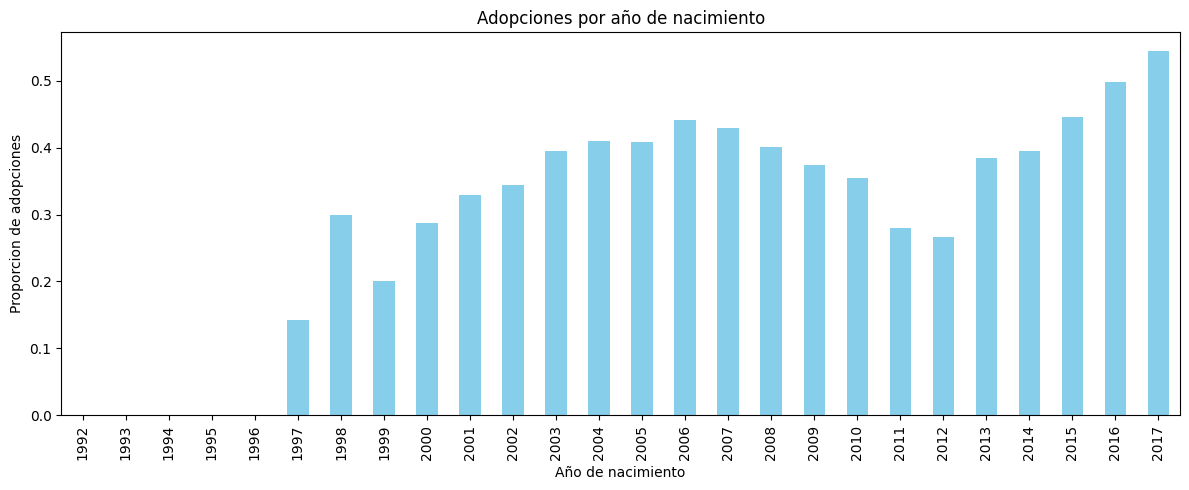

In [65]:
adopciones_por_anio['Adoption'].plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title("Adopciones por año de nacimiento")
plt.xlabel("Año de nacimiento")
plt.ylabel("Proporcion de adopciones")
plt.tight_layout()
plt.show()

9. **Relación entre edad y resultado:** Explorá si existe una diferencia en el tipo de resultado según la edad del animal.

In [70]:
# 10 edades más frecuentes
top_edades = df['Edad'].value_counts().head(10).index
df_top_edades = df[df['Edad'].isin(top_edades)]
df_top_edades


,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat,EsMestizo,TipoRaza,AnioNacimiento
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,NaN,False,True,tabby,orange,NaN,orange,True,Mestizo,2014
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,NaN,False,True,tabby,blue,white,blue,True,Mestizo,2014
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,NaN,False,True,NaN,white,black,white,True,Mestizo,2014
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,NaN,False,True,NaN,black,white,black,True,Mestizo,2013
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,NaN,False,True,NaN,black,white,black,True,Mestizo,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29414,2 months,A760267,Cat,domestic shorthair,gray /black,2017-08-15,2017-10-26 21:53:00,2017-10-26T21:53:00,Van Dayum,NaN,...,NaN,False,True,tabby,gray,black,gray,True,Mestizo,2017
29415,1 year,A765881,Cat,domestic mediumhair,brown /white,2016-07-29,2018-02-01 14:50:00,2018-02-01T14:50:00,Wonder Woman,NaN,...,NaN,False,True,tabby,brown,white,brown,True,Mestizo,2016
29416,2 months,A758112,Cat,american shorthair,blue /white,2017-09-14,2017-12-10 17:44:00,2017-12-10T17:44:00,Allee Chat,NaN,...,NaN,True,False,tabby,blue,white,blue,False,Raza pura,2017
29417,1 month,A758569,Cat,domestic shorthair,brown /white,2017-08-03,2017-09-24 11:57:00,2017-09-24T11:57:00,Mia,NaN,...,NaN,False,True,tabby,brown,white,brown,True,Mestizo,2017


In [72]:
tabla_edad_resultado = pd.crosstab(df_top_edades['Edad'], df_top_edades['TipoResultado'], normalize='index')
tabla_edad_resultado

TipoResultado,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
Edad,,,,,,,,
1 month,0.340129,0.056688,0.000000,0.103431,0.000497,0.006464,0.000000,0.492790
1 year,0.285344,0.007486,0.002016,0.050389,0.000864,0.060754,0.000576,0.592571
2 months,0.838079,0.007077,0.000000,0.012637,0.001011,0.004886,0.000337,0.135973
2 weeks,0.000000,0.013687,0.000000,0.022241,0.000855,0.001711,0.000000,0.961506
2 years,0.251731,0.007332,0.000815,0.072912,0.000000,0.108758,0.004073,0.554379
3 months,0.724393,0.007816,0.000000,0.016043,0.002057,0.009050,0.000000,0.240642
3 weeks,0.000000,0.011662,0.000000,0.022595,0.000729,0.000729,0.000000,0.964286
3 years,0.347000,0.012000,0.001000,0.072000,0.000000,0.137000,0.004000,0.427000
4 months,0.619469,0.005162,0.000000,0.021386,0.004425,0.022861,0.001475,0.325221


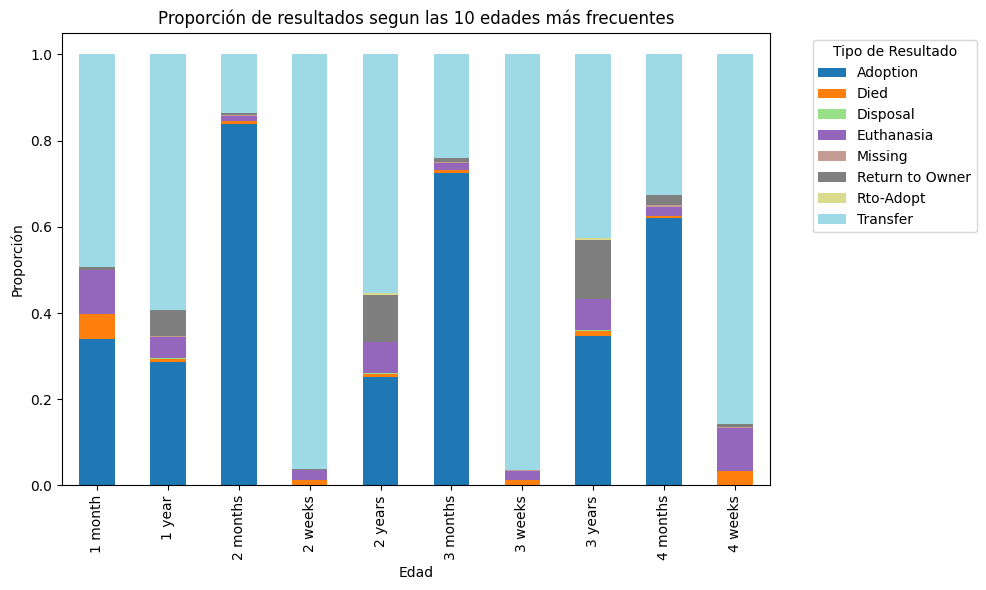

In [74]:
# grafico de barras apiladas
tabla_edad_resultado.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Proporción de resultados segun las 10 edades más frecuentes")
plt.xlabel("Edad")
plt.ylabel("Proporción")
plt.legend(title='Tipo de Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

10. **Exportar datos filtrados:** Filtrá los animales que fueron adoptados y guardalos en un nuevo archivo CSV llamado `adoptados.csv`.

In [75]:
adoptados = df[df['TipoResultado'] == 'Adoption']

# Exportar a CSV
adoptados.to_csv('adoptados.csv', index=False)
print("Archivo 'adoptados.csv' guardado correctamente.")

Archivo 'adoptados.csv' guardado correctamente.
